<a href="https://colab.research.google.com/github/munenobuk/sample-ripo/blob/main/Python%E3%81%A7%E7%94%9F%E7%89%A9%E7%B5%B1%E8%A8%88%E5%AD%A6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ObGyn.jp**

# **https://obgyn.jp/logrank-cox/**

### **基本統計量**

In [ ]:
import pandas as pd

In [ ]:
data = pd.DataFrame({"術者":["太郎","花子","太郎","花子","太郎","花子"], "手術方法":["内視鏡","開腹","開腹","内視鏡","内視鏡","内視鏡"], "手術時間":[60,50,100,90,30,40], "出血量":[15,25,35,55,45,25]})

In [ ]:
data

,術者,手術方法,手術時間,出血量
0,太郎,内視鏡,60,15
1,花子,開腹,50,25
2,太郎,開腹,100,35
3,花子,内視鏡,90,55
4,太郎,内視鏡,30,45
5,花子,内視鏡,40,25


In [ ]:
data.describe()

,手術時間,出血量
count,6.000000,6.000000
mean,61.666667,33.333333
std,27.868740,14.719601
min,30.000000,15.000000
25%,42.500000,25.000000
50%,55.000000,30.000000
75%,82.500000,42.500000
max,100.000000,55.000000


In [ ]:
group = data.groupby('術者')

In [ ]:
group.describe()

手術時間                                                        出血量  \
   count       mean        std   min   25%   50%   75%    max count   
術者                                                                    
太郎   3.0  63.333333  35.118846  30.0  45.0  60.0  80.0  100.0   3.0   
花子   3.0  60.000000  26.457513  40.0  45.0  50.0  70.0   90.0   3.0   

                                                        
         mean        std   min   25%   50%   75%   max  
術者                                                      
太郎  31.666667  15.275252  15.0  25.0  35.0  40.0  45.0  
花子  35.000000  17.320508  25.0  25.0  25.0  40.0  55.0

In [ ]:
len(data)

6

In [ ]:
data.sum()

術者          太郎花子太郎花子太郎花子
手術方法    内視鏡開腹開腹内視鏡内視鏡内視鏡
手術時間                 370
出血量                  200
dtype: object

In [ ]:
data.mean() #平均

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


手術時間    61.666667
出血量     33.333333
dtype: float64

In [ ]:
data.var()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


手術時間    776.666667
出血量     216.666667
dtype: float64

In [ ]:
data.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


手術時間    27.868740
出血量     14.719601
dtype: float64

In [ ]:
data.max()

術者       花子
手術方法     開腹
手術時間    100
出血量      55
dtype: object

In [ ]:
data.min()

術者       太郎
手術方法    内視鏡
手術時間     30
出血量      15
dtype: object

In [ ]:
data.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


手術時間    55.0
出血量     30.0
dtype: float64

 **クロス集計表**

In [49]:
import pandas as pd

In [50]:
data = pd.DataFrame({"術者":["太郎","花子","太郎","花子","太郎","花子"], "手術方法":["内視鏡","開腹","開腹","内視鏡","内視鏡","内視鏡"], "手術時間":[60,50,100,90,30,40], "出血量":[15,25,35,55,45,25]})

In [51]:
data

,術者,手術方法,手術時間,出血量
0,太郎,内視鏡,60,15
1,花子,開腹,50,25
2,太郎,開腹,100,35
3,花子,内視鏡,90,55
4,太郎,内視鏡,30,45
5,花子,内視鏡,40,25


In [53]:
pd.pivot_table(data, values = '手術時間', index = '術者', columns = '手術方法', aggfunc = 'mean')

手術方法,内視鏡,開腹
術者,,
太郎,45,100
花子,65,50


In [54]:
pd.pivot_table(data, values=['手術時間', '出血量'], index = '術者', columns = '手術方法', aggfunc = 'mean')

出血量     手術時間     
手術方法 内視鏡  開腹  内視鏡   開腹
術者                    
太郎    30  35   45  100
花子    40  25   65   50

aggfunc は以下のように変えられる。
mean: 平均
count: データの個数
sum: 合計
var: 分散
std: 標準偏差
max: 最大値
min: 最小値
median: 中央値

margins = True を付け加えると、小計を表示する。また、aggfunc = “count” とすることで件数を表示する通常のクロス集計になる。

In [55]:
pd.pivot_table(data, values = '手術時間', index = '術者', columns = '手術方法', aggfunc = 'count', margins = True)

手術方法,内視鏡,開腹,All
術者,,,
太郎,2,1,3
花子,2,1,3
All,4,2,6


### **相関係数の計算**

In [56]:
import pandas as pd

In [57]:
data = pd.DataFrame({"縫合結紮の練習時間 (時間)":[100,150,200,250,300,1000], "手術時間 (分)":[210,220,150,100,90,45], "出血量 (ml)":[50,70,60,30,20,10]})

In [58]:
data

,縫合結紮の練習時間 (時間),手術時間 (分),出血量 (ml)
0,100,210,50
1,150,220,70
2,200,150,60
3,250,100,30
4,300,90,20
5,1000,45,10


In [59]:
data.corr()

,縫合結紮の練習時間 (時間),手術時間 (分),出血量 (ml)
縫合結紮の練習時間 (時間),1.000000,-0.776463,-0.733453
手術時間 (分),-0.776463,1.000000,0.913036
出血量 (ml),-0.733453,0.913036,1.000000


In [60]:
data.corr(method = 'spearman')

,縫合結紮の練習時間 (時間),手術時間 (分),出血量 (ml)
縫合結紮の練習時間 (時間),1.000000,-0.942857,-0.828571
手術時間 (分),-0.942857,1.000000,0.942857
出血量 (ml),-0.828571,0.942857,1.000000


In [61]:
data.corr(method = 'kendall')

,縫合結紮の練習時間 (時間),手術時間 (分),出血量 (ml)
縫合結紮の練習時間 (時間),1.000000,-0.866667,-0.733333
手術時間 (分),-0.866667,1.000000,0.866667
出血量 (ml),-0.733333,0.866667,1.000000


Pandas だけでは P 値は自動計算されない。これも計算したい場合は以下のように scipy.stats を import して使う。ここでは、x = 縫合結紮の練習時間 (時間)、y = 手術時間 (分)を data から抽出し、x と y の相関係数と両側検定による P 値を計算している。

In [62]:
from scipy import stats

In [63]:
x, y = data['縫合結紮の練習時間 (時間)'], data['手術時間 (分)']

In [64]:
stats.pearsonr(x, y)

(-0.776462759687889, 0.06936839195099649)

In [66]:
stats.spearmanr(x, y)

SpearmanrResult(correlation=-0.942857142857143, pvalue=0.004804664723032055)

## **信頼区間の計算**

In [68]:
import pandas as pd
from scipy import stats

In [69]:
data = pd.DataFrame({"手術時間":[60,50,100,90,30,40], "出血量":[15,25,35,55,45,25]})

In [70]:
data

,手術時間,出血量
0,60,15
1,50,25
2,100,35
3,90,55
4,30,45
5,40,25


In [71]:
time = data['手術時間']

In [78]:
stats.t.interval(alpha = 0.95, df = len(time)-1, loc = time.mean(), scale = stats.sem(time)) #t分布を仮定した信頼区間

(32.42021770800455, 90.91311562532877)

In [ ]:
stats.t.interval(alpha = 0.95, df = len(time)-1, loc = time.mean(), scale = stats.sem(time)) #t分布を仮定した信頼区間

(32.42021770800455, 90.91311562532877)

In [88]:
stats.norm.interval(alpha=0.95, loc=time.mean(), scale=time.std()) #正規分布を仮定

(7.044940060802489, 116.28839327253084)

### **2群間の比較**

In [2]:
import pandas as pd
from scipy import stats

In [4]:
data = pd.DataFrame({"手術方法":["内視鏡","開腹","開腹","内視鏡","内視鏡","内視鏡","開腹","開腹"], "手術時間":[60,50,100,90,30,40,80,90], "出血量":[15,100,90,20,18,20,120,90]})

In [5]:
data

,手術方法,手術時間,出血量
0,内視鏡,60,15
1,開腹,50,100
2,開腹,100,90
3,内視鏡,90,20
4,内視鏡,30,18
5,内視鏡,40,20
6,開腹,80,120
7,開腹,90,90


In [9]:
A = data.query('手術方法 =="内視鏡"')
B = data.query('手術方法 == "開腹"')

In [13]:
A.describe()

,手術時間,出血量
count,4.000000,4.000000
mean,55.000000,18.250000
std,26.457513,2.362908
min,30.000000,15.000000
25%,37.500000,17.250000
50%,50.000000,19.000000
75%,67.500000,20.000000
max,90.000000,20.000000


In [14]:
B.describe()

,手術時間,出血量
count,4.000000,4.000000
mean,80.000000,100.000000
std,21.602469,14.142136
min,50.000000,90.000000
25%,72.500000,90.000000
50%,85.000000,95.000000
75%,92.500000,105.000000
max,100.000000,120.000000


In [23]:
stats.ttest_ind(A['手術時間'], B['手術時間'])

Ttest_indResult(statistic=-1.4638501094227996, pvalue=0.19356964707988242)

In [21]:
stats.ttest_ind(A['出血量'], B['出血量'])

Ttest_indResult(statistic=-11.403122905519286, pvalue=2.7271283178052923e-05)

In [25]:
stats.ttest_ind(A['手術時間'], B['手術時間'], equal_var = False)

Ttest_indResult(statistic=-1.4638501094227996, pvalue=0.19549239081595376)

In [26]:
stats.mannwhitneyu(A['手術時間'], B['手術時間'])

MannwhitneyuResult(statistic=3.5, pvalue=0.24538345847336318)

### Fisher exact test **とカイ2乗検定** 


In [89]:
import pandas as pd
from scipy import stats

In [90]:
data = pd.DataFrame({"術者":["太郎","太郎","花子","花子"], "手術方法":["内視鏡","開腹","内視鏡","開腹"], "回数":[60,5,20,40]})

In [91]:
data

,術者,手術方法,回数
0,太郎,内視鏡,60
1,太郎,開腹,5
2,花子,内視鏡,20
3,花子,開腹,40


In [92]:
table = pd.pivot_table(data, values = '回数', index = '術者', columns = '手術方法', aggfunc = 'sum')

In [93]:
table

手術方法,内視鏡,開腹
術者,,
太郎,60,5
花子,20,40


In [95]:
stats.fisher_exact(table)

(24.0, 2.002620491818156e-12)

In [101]:
chi2, p, dof, expected = stats.chi2_contingency(table)

In [102]:
p

2.4508469848383784e-11

**Kruskal-Wallis test と ANOVA**

In [103]:
import pandas as pd
from scipy import stats

In [104]:
data = pd.DataFrame({"デバイス":["デバイス A","デバイス B","デバイス A","デバイス A","デバイス C","デバイス C","デバイス B","デバイス C","デバイス A","デバイス A",], "出血量":[30,20,5,5,100,80,10,60,10,25]})

In [105]:
data

,デバイス,出血量
0,デバイス A,30
1,デバイス B,20
2,デバイス A,5
3,デバイス A,5
4,デバイス C,100
5,デバイス C,80
6,デバイス B,10
7,デバイス C,60
8,デバイス A,10
9,デバイス A,25


In [110]:
a = data.query("デバイス == 'デバイス A'")

In [111]:
b = data.query("デバイス == 'デバイス B'")

In [112]:
c = data.query("デバイス == 'デバイス C'")

In [114]:
a.describe()

,出血量
count,5.000000
mean,15.000000
std,11.726039
min,5.000000
25%,5.000000
50%,10.000000
75%,25.000000
max,30.000000


In [115]:
b.describe()

,出血量
count,2.000000
mean,15.000000
std,7.071068
min,10.000000
25%,12.500000
50%,15.000000
75%,17.500000
max,20.000000


In [116]:
c.describe()

,出血量
count,3.0
mean,80.0
std,20.0
min,60.0
25%,70.0
50%,80.0
75%,90.0
max,100.0


In [117]:
x = a['出血量']
y = b['出血量']
z = c['出血量']

In [118]:
stats.kruskal(x, y, z)

KruskalResult(statistic=5.816871165644168, pvalue=0.05456101933353352)

In [119]:
stats.f_oneway(x, y, z)

F_onewayResult(statistic=22.18125, pvalue=0.0009345049370035522)

**Tukey-Kramer test**

In [121]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [122]:
data = pd.DataFrame({"デバイス":["デバイス A","デバイス B","デバイス A","デバイス A","デバイス C","デバイス C","デバイス B","デバイス C","デバイス A","デバイス A",], "出血量":[30,20,5,5,100,80,10,60,10,25]})

In [123]:
data

,デバイス,出血量
0,デバイス A,30
1,デバイス B,20
2,デバイス A,5
3,デバイス A,5
4,デバイス C,100
5,デバイス C,80
6,デバイス B,10
7,デバイス C,60
8,デバイス A,10
9,デバイス A,25


In [128]:
pairwise_tukeyhsd(data['出血量'], data['デバイス']).summary() #95％CI

group1,group2,meandiff,p-adj,lower,upper,reject
デバイス A,デバイス B,0.0,0.9,-34.8105,34.8105,False
デバイス A,デバイス C,65.0,0.001,34.6149,95.3851,True
デバイス B,デバイス C,65.0,0.0037,27.0186,102.9814,True


In [131]:
pairwise_tukeyhsd(data['出血量'], data['デバイス'], alpha=0.01).summary() #99%CI

group1,group2,meandiff,p-adj,lower,upper,reject
デバイス A,デバイス B,0.0,0.9,-49.4654,49.4654,False
デバイス A,デバイス C,65.0,0.001,21.8231,108.1769,True
デバイス B,デバイス C,65.0,0.0037,11.0288,118.9712,True


### **重回帰分析**

In [134]:
import pandas as pd
import statsmodels.formula.api as smf

In [135]:
data = pd.DataFrame({"出血量":[10,200,300,5,5,3,250,500], "手術方法":["内視鏡","開腹","開腹","内視鏡","内視鏡","内視鏡","開腹","開腹"], "手術時間":[60,50,60,60,30,40,60,50]})

In [136]:
data

,出血量,手術方法,手術時間
0,10,内視鏡,60
1,200,開腹,50
2,300,開腹,60
3,5,内視鏡,60
4,5,内視鏡,30
5,3,内視鏡,40
6,250,開腹,60
7,500,開腹,50


statsmodels.formula.api.ols() コマンドで重回帰分析を行う。単回帰分析を行うこともできる。手術方法のような2値データはダミーに変換される。

In [138]:
lm = smf.ols('出血量 ~ 手術時間 + 手術方法', data).fit()
lm.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    出血量   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     9.196
Date:                Sat, 23 Jul 2022   Prob (F-statistic):             0.0211
Time:                        08:20:16   Log-Likelihood:                -46.417
No. Observations:                   8   AIC:                             98.83
Df Residuals:                       5   BIC:                             99.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.9677    180.129      0.261      0.805    -416.068     510.003
手術方法[T.開腹]   313.2581     76.660      4.086      0.009     116.197     510.319
手術時間          -0.8677      3.639     -0.238      0.821     -10.222       8.487
==============================================================================
Omnibus:                        6.905   Durbin-Watson:                   1.771
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                1.842
Skew:                           1.059   Prob(JB):                        0.398
Kurtosis:                       4.020   Cond. No.                         264.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

statsmodels.formula.api.glm() コマンドを使い、一般化線形モデルとして重回帰分析を行うこともできる。この場合、検定は t 検定ではなく、Wald 検定が行われる。リンク関数は恒等関数が自動的に選択される。また、summary() コマンドで AIC（赤池情報量基準）は表示されない。

In [139]:
import statsmodels.api as sm
glm = smf.glm(formula = '出血量 ~ 手術時間 + 手術方法', data=data, family = sm.families.Gaussian()).fit()

In [140]:
glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    出血量   No. Observations:                    8
Model:                            GLM   Df Residuals:                        5
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                          10264.
Method:                          IRLS   Log-Likelihood:                -46.417
Date:                Sat, 23 Jul 2022   Deviance:                       51318.
Time:                        08:23:48   Pearson chi2:                 5.13e+04
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.9677    180.129      0.261      0.794    -306.078     400.013
手術方法[T.開腹]   313.2581     76.660      4.086      0.000     163.007     463.509
手術時間          -0.8677      3.639     -0.238      0.812      -8.000       6.265
==============================================================================
"""

In [141]:
glm.aic

98.8338891446474

**ロジスティック回帰分析**

In [144]:
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [145]:
data = pd.DataFrame({"再発":["yes","yes","yes","no","no","no","yes","no","yes","yes"], "化学療法回数":[6,5,4,3,3,3,1,0,0,0], "手術時腫瘍残存":["yes","yes","yes","no","no","no","no","no","yes","yes"]})

In [147]:
data

,再発,化学療法回数,手術時腫瘍残存
0,yes,6,yes
1,yes,5,yes
2,yes,4,yes
3,no,3,no
4,no,3,no
5,no,3,no
6,yes,1,no
7,no,0,no
8,yes,0,yes
9,yes,0,yes


statsmodels.formula.api.glm() コマンドでロジスティック回帰分析を行う。リンク関数はロジット関数が自動的に選択される。

In [149]:
result = smf.glm(formula = '再発 ~ 化学療法回数 + 手術時腫瘍残存', data=data, family=sm.families.Binomial()).fit()

In [150]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Generalized Linear Model Regression Results                   
=================================================================================
Dep. Variable:     ['再発[no]', '再発[yes]']   No. Observations:                   10
Model:                               GLM   Df Residuals:                        7
Model Family:                   Binomial   Df Model:                            2
Link Function:                     logit   Scale:                          1.0000
Method:                             IRLS   Log-Likelihood:                -2.1220
Date:                   Sat, 23 Jul 2022   Deviance:                       4.2440
Time:                           08:27:58   Pearson chi2:                     3.59
No. Iterations:                       20                                         
Covariance Type:               nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.1086      1.735      0.063      0.950      -3.292       3.509
手術時腫瘍残存[T.yes]   -25.0302   1.15e+04     -0.002      0.998   -2.26e+04    2.25e+04
化学療法回数             0.7833      0.967      0.810      0.418      -1.112       2.679
==================================================================================
"""

In [151]:
result.aic

10.244038851558427

### **Kaplan-Meier 法、ログランク検定、Cox 比例ハザードモデル**

In [155]:
!pip install lifelines
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.statistics import logrank_test
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [156]:
data = pd.DataFrame({"患者番号":[1,2,3,4,5,6,7,8,9,10], "抗がん剤":["A","A","A","A","A","B","B","B","B","B"], "生存期間":[20,30,40,50,60,55,75,105,115,120], "打ち切り":[1,1,1,1,0,1,1,1,1,0], "全身状態":[2,3,2,3,2,0,1,0,0,1]})

In [157]:
data

,患者番号,抗がん剤,生存期間,打ち切り,全身状態
0,1,A,20,1,2
1,2,A,30,1,3
2,3,A,40,1,2
3,4,A,50,1,3
4,5,A,60,0,2
5,6,B,55,1,0
6,7,B,75,1,1
7,8,B,105,1,0
8,9,B,115,1,0
9,10,B,120,0,1


In [162]:
#A群
A = data.query('抗がん剤 == "A"')
kmf_A = KaplanMeierFitter()
kmf_A.fit(A.生存期間, A.打ち切り)


<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 5 total observations, 1 right-censored observations>

In [163]:
#B群
B = data.query('抗がん剤 == "B"')
kmf_B = KaplanMeierFitter()
kmf_B.fit(B.生存期間, B.打ち切り)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 5 total observations, 1 right-censored observations>

In [164]:
#生存時間中央値
kmf_A.median_survival_time_

40.0

In [165]:
#生存時間中央値
kmf_B.median_survival_time_

105.0

In [166]:
#生存確率，信頼区間
kmf_A.confidence_interval_survival_function_

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.0,1.000000,1.000000
20.0,0.203809,0.969180
30.0,0.125730,0.881756
40.0,0.051976,0.752816
50.0,0.008369,0.581853
60.0,0.008369,0.581853


In [167]:
#生存確率，信頼区間
kmf_B.confidence_interval_survival_function_

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.0,1.000000,1.000000
55.0,0.203809,0.969180
75.0,0.125730,0.881756
105.0,0.051976,0.752816
115.0,0.008369,0.581853
120.0,0.008369,0.581853


In [168]:
#5年生存率（60ヶ月）
kmf_A.predict(60)

0.2

In [169]:
#5年生存率（60ヶ月）
kmf_B.predict(60)

0.8

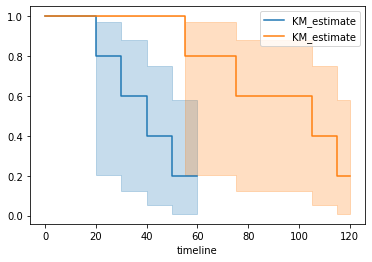

In [171]:
#Kaplan-Meier曲線の図示
kmf_A.plot() and kmf_B.plot()

In [172]:
result = logrank_test(A.生存期間, B.生存期間, A.打ち切り, B.打ち切り)

In [174]:
result.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           4.62 0.03      4.99

In [175]:
result.p_value

0.031572354295734684

次に、Cox 比例ハザードモデル分析を行う。lifelines で Cox 比例ハザードモデル分析を行う場合、data に “A”、”B” などの文字が含まれているとうまく解析できない。また、変量名に “生存期間” などの日本語（2バイト文字）を使うとグラフのラベルに表示されない。

In [178]:
data

,患者番号,抗がん剤,生存期間,打ち切り,全身状態
0,1,A,20,1,2
1,2,A,30,1,3
2,3,A,40,1,2
3,4,A,50,1,3
4,5,A,60,0,2
5,6,B,55,1,0
6,7,B,75,1,1
7,8,B,105,1,0
8,9,B,115,1,0
9,10,B,120,0,1


In [176]:
data_cox = pd.DataFrame({"Group":[0,0,0,0,0,1,1,1,1,1], "Duration":[20,30,40,50,60,55,75,105,115,120], "Censor":[1,1,1,1,0,1,1,1,1,0], "PS":[2,3,2,3,2,0,1,0,0,1]})

In [177]:
data_cox

,Group,Duration,Censor,PS
0,0,20,1,2
1,0,30,1,3
2,0,40,1,2
3,0,50,1,3
4,0,60,0,2
5,1,55,1,0
6,1,75,1,1
7,1,105,1,0
8,1,115,1,0
9,1,120,0,1


In [181]:
cph = CoxPHFitter()
cph.fit(data_cox, "Duration", "Censor")
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 10 total observations, 2 right-censored observations>
             duration col = 'Duration'
                event col = 'Censor'
      baseline estimation = breslow
   number of observations = 10
number of events observed = 8
   partial log-likelihood = -11.24
         time fit was run = 2022-07-23 08:41:12 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
Group      -2.34       0.10       1.84            -5.94             1.27                 0.00                 3.55
PS         -0.11       0.90       0.75            -1.58             1.37                 0.21                 3.92

            cmp to     z    p   -log2(p)
covariate                               
Group         0.00 -1.27 0.20       2.29
PS            0.00 -0.14 0.89       0.17
---
Concordance = 0.76
Partial AIC = 26.49
log-likelihood ratio test = 4.50 on 2 df
-log2(p) of ll-ratio test = 3.25

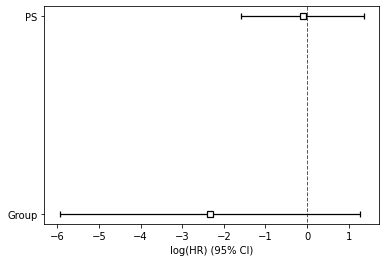

In [182]:
cph.plot()